**Вариант 1. Очистка данных и обучение моделей.**

Данный вариант предполагает фокусировку на обучении нескольких видов моделей обучения с учителем. В зависимости от набора данных, может предполагаться задача классификации и регрессии. Необходимо после минимальной подготовки датасета к обучению обучить несколько моделей и сравнить их эффективность.

В машинном обучении, задача классификации и задача регрессии отличаются по своей природе и цели.

__Задача классификации:__
- Цель: Классификация объектов на заранее определенные категории или классы.
- Входные данные: Объекты или примеры, для которых известны метки классов.
- Выходные данные: Дискретные метки классов или вероятности принадлежности к каждому классу.
- Примеры: Определение, является ли электронное письмо спамом или не спамом, классификация изображений на категории (кошка, собака, автомобиль), определение тональности текста (положительная, отрицательная, нейтральная).

__Задача регрессии:__
- Цель: Предсказание непрерывного числового значения, основанного на входных данных.
- Входные данные: Объекты или примеры, для которых известны числовые значения.
- Выходные данные: Предсказанное числовое значение или набор значений.
- Примеры: Предсказание цены дома на основе его характеристик (площадь, количество комнат), прогнозирование продажи товаров в будущем, оценка вероятности возникновения определенного события.

Ещё раз - в задаче классификации мы стараемся определить, к какому заранее определенному классу относится объект на основе доступных данных. В задаче регрессии мы стремимся предсказать непрерывное числовое значение, которое может быть любым из возможных значений в заданном диапазоне.


Исходя из этого на экзамене надо будет определить что за задача и решать её определённым способом.
В этом ноутбуке я покажу решения для классификации на датасете, которыйу Коротеева в методичке.

## Если вам попалась задачи классификации (зависит от датасета, нужно понять самим)
Для примера возбьмём датасет https://www.kaggle.com/datasets/lodetomasi1995/income-classification
Если перейдёте по ссылке, то там будет дополнительная информация, конкретно у этого датасета написано - он нужен для классификации доходов человека, а именно - зарабатывает он меньше 50.000$ или больше.

***Note:*** Вам может показаться, что это задача регрессии, мол тут зарплату можно интепретировать как непрерывную величину, но это не так. Надо быть внимательным! Здесь два класса людей - условно нищеброд (до 50к баксов) и альфа (50к баксов и больше )

Переходите по ссылке и скачивайте датасет
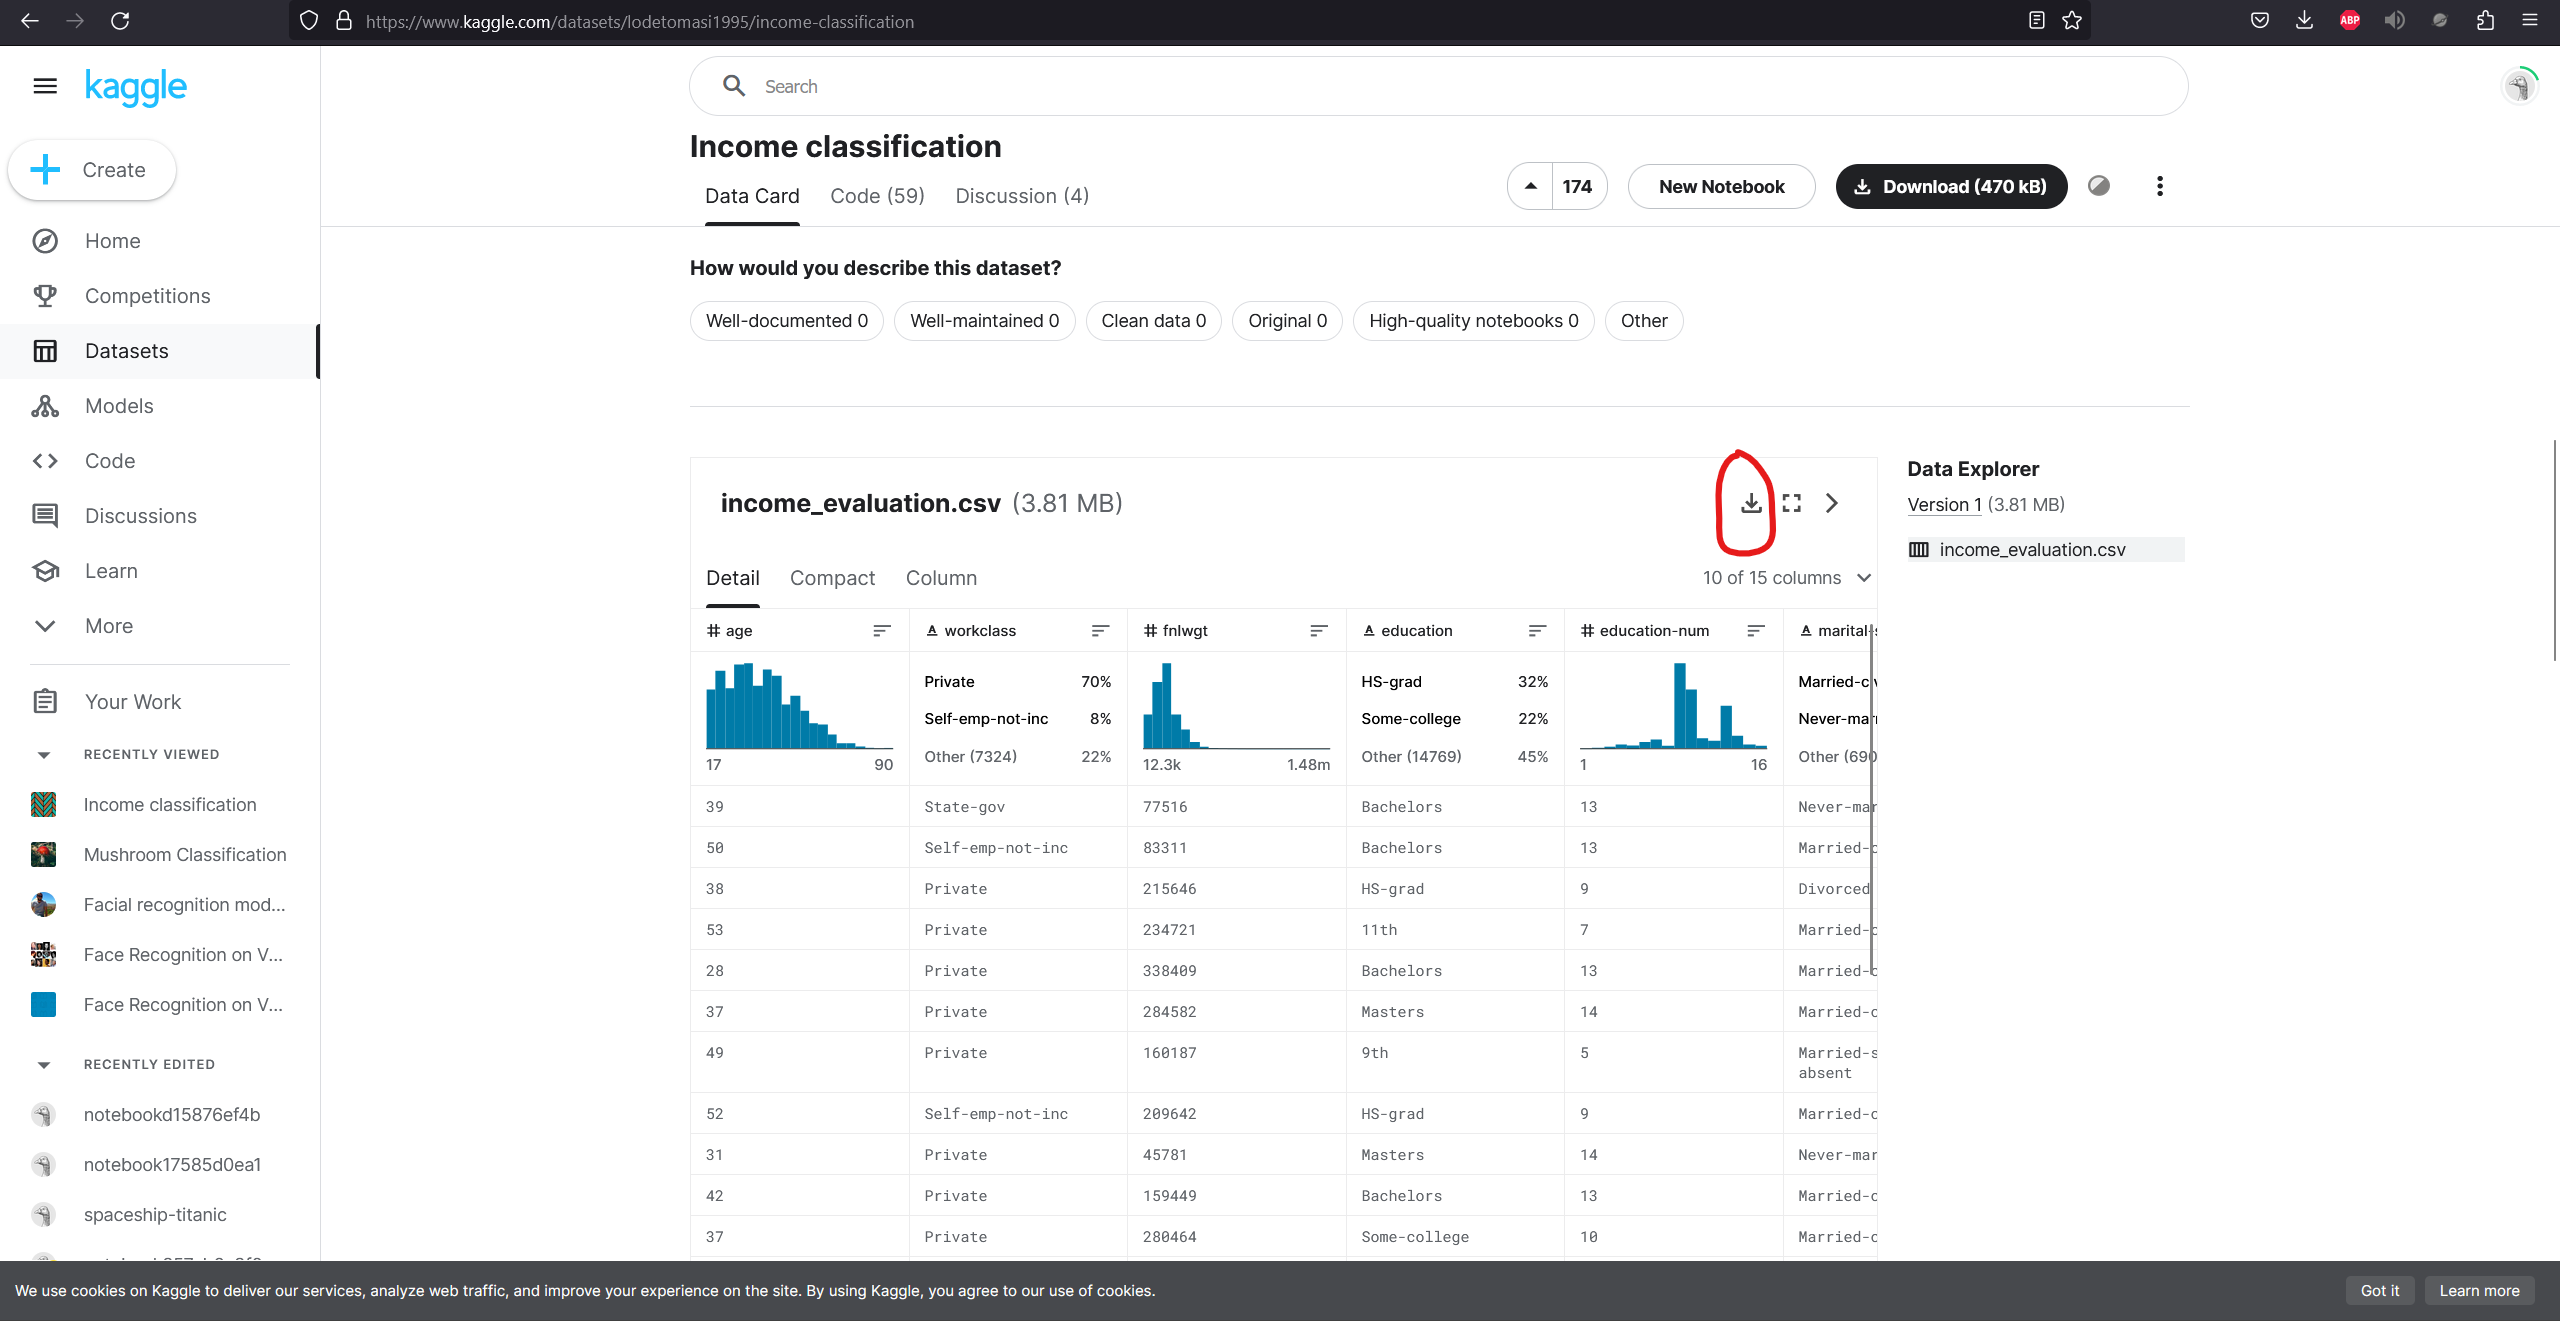

ещё там есть код, который писали другие люди, его тоже можно использовать, если он вам понадобится. посмотреть ноутбуки можно вроде бы только зарегистрированным пользователям, я не помню.
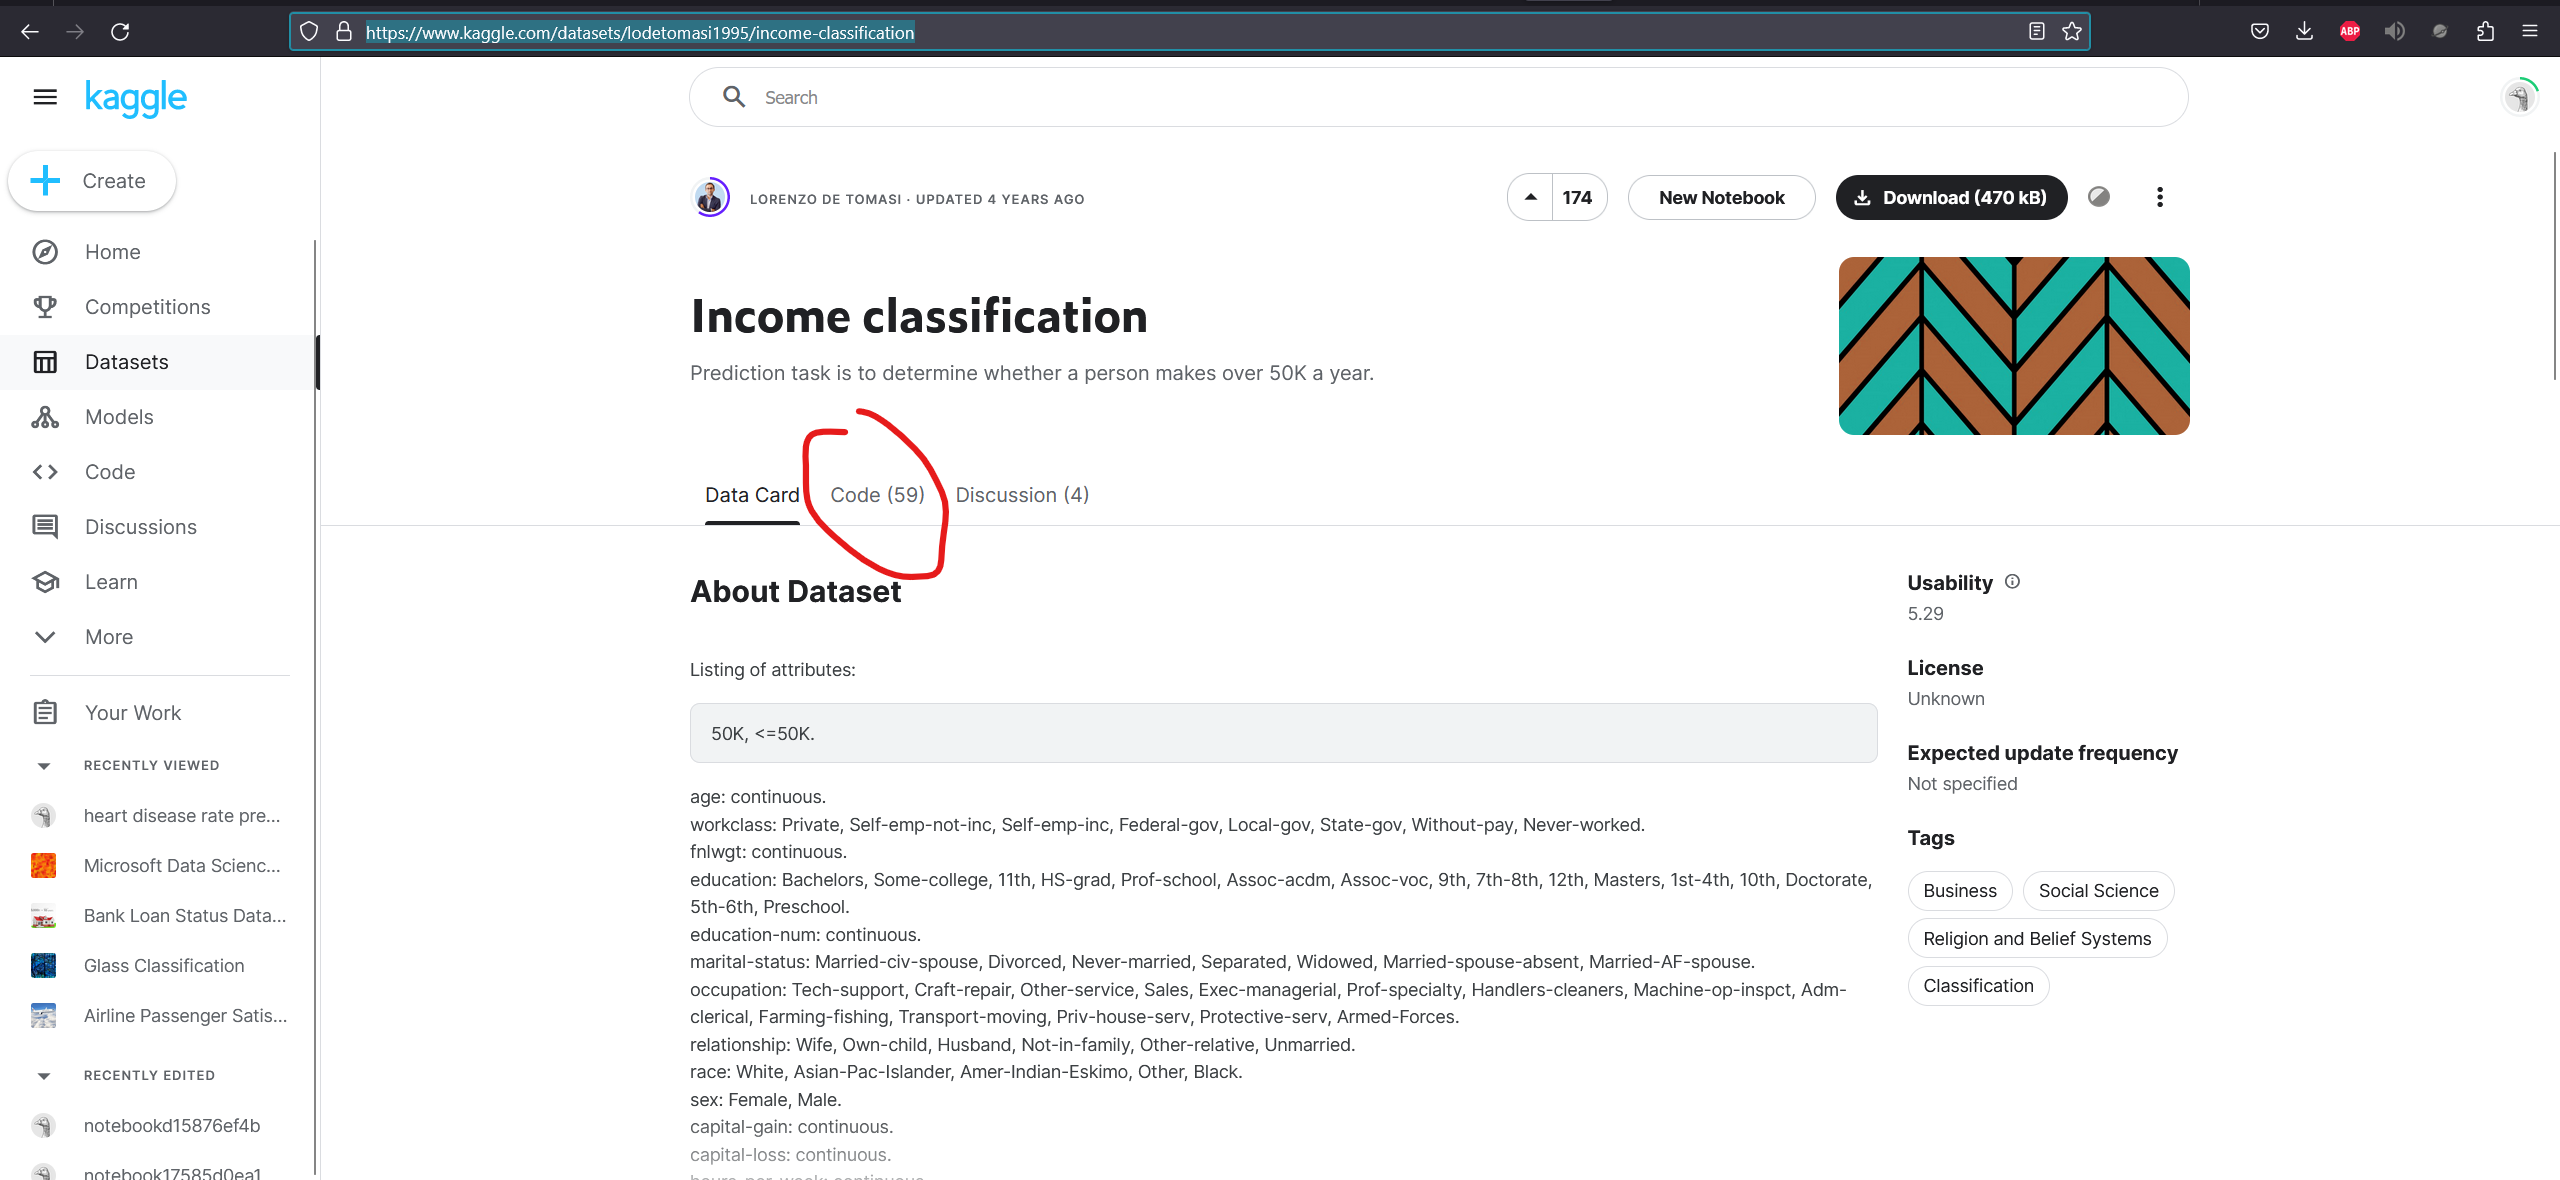

### Ниже представлено решение этой задачи.

нужно именно повторить так, как ниже, потому что чёлка доёбывается до всего.

# Вариант 1. Очистка данных и обучение моделей. Датасет https://www.kaggle.com/datasets/lodetomasi1995/income-classification

Данный вариант предполагает фокусировку на обучении нескольких видов моделей обучения с учителем. В зависимости от набора данных, может предполагаться задача классификации и регрессии. Необходимо после минимальной подготовки датасета к обучению обучить несколько моделей и сравнить их эффективность.


**Импортируем нужные библиотеки**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Предобработка данных

**Считываем данные**

In [2]:
dataset = pd.read_csv('income_evaluation.csv')
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


эту картинку вставлять не надо, показываю откуда брать описание. Достаточно просто прогнать через переводчик
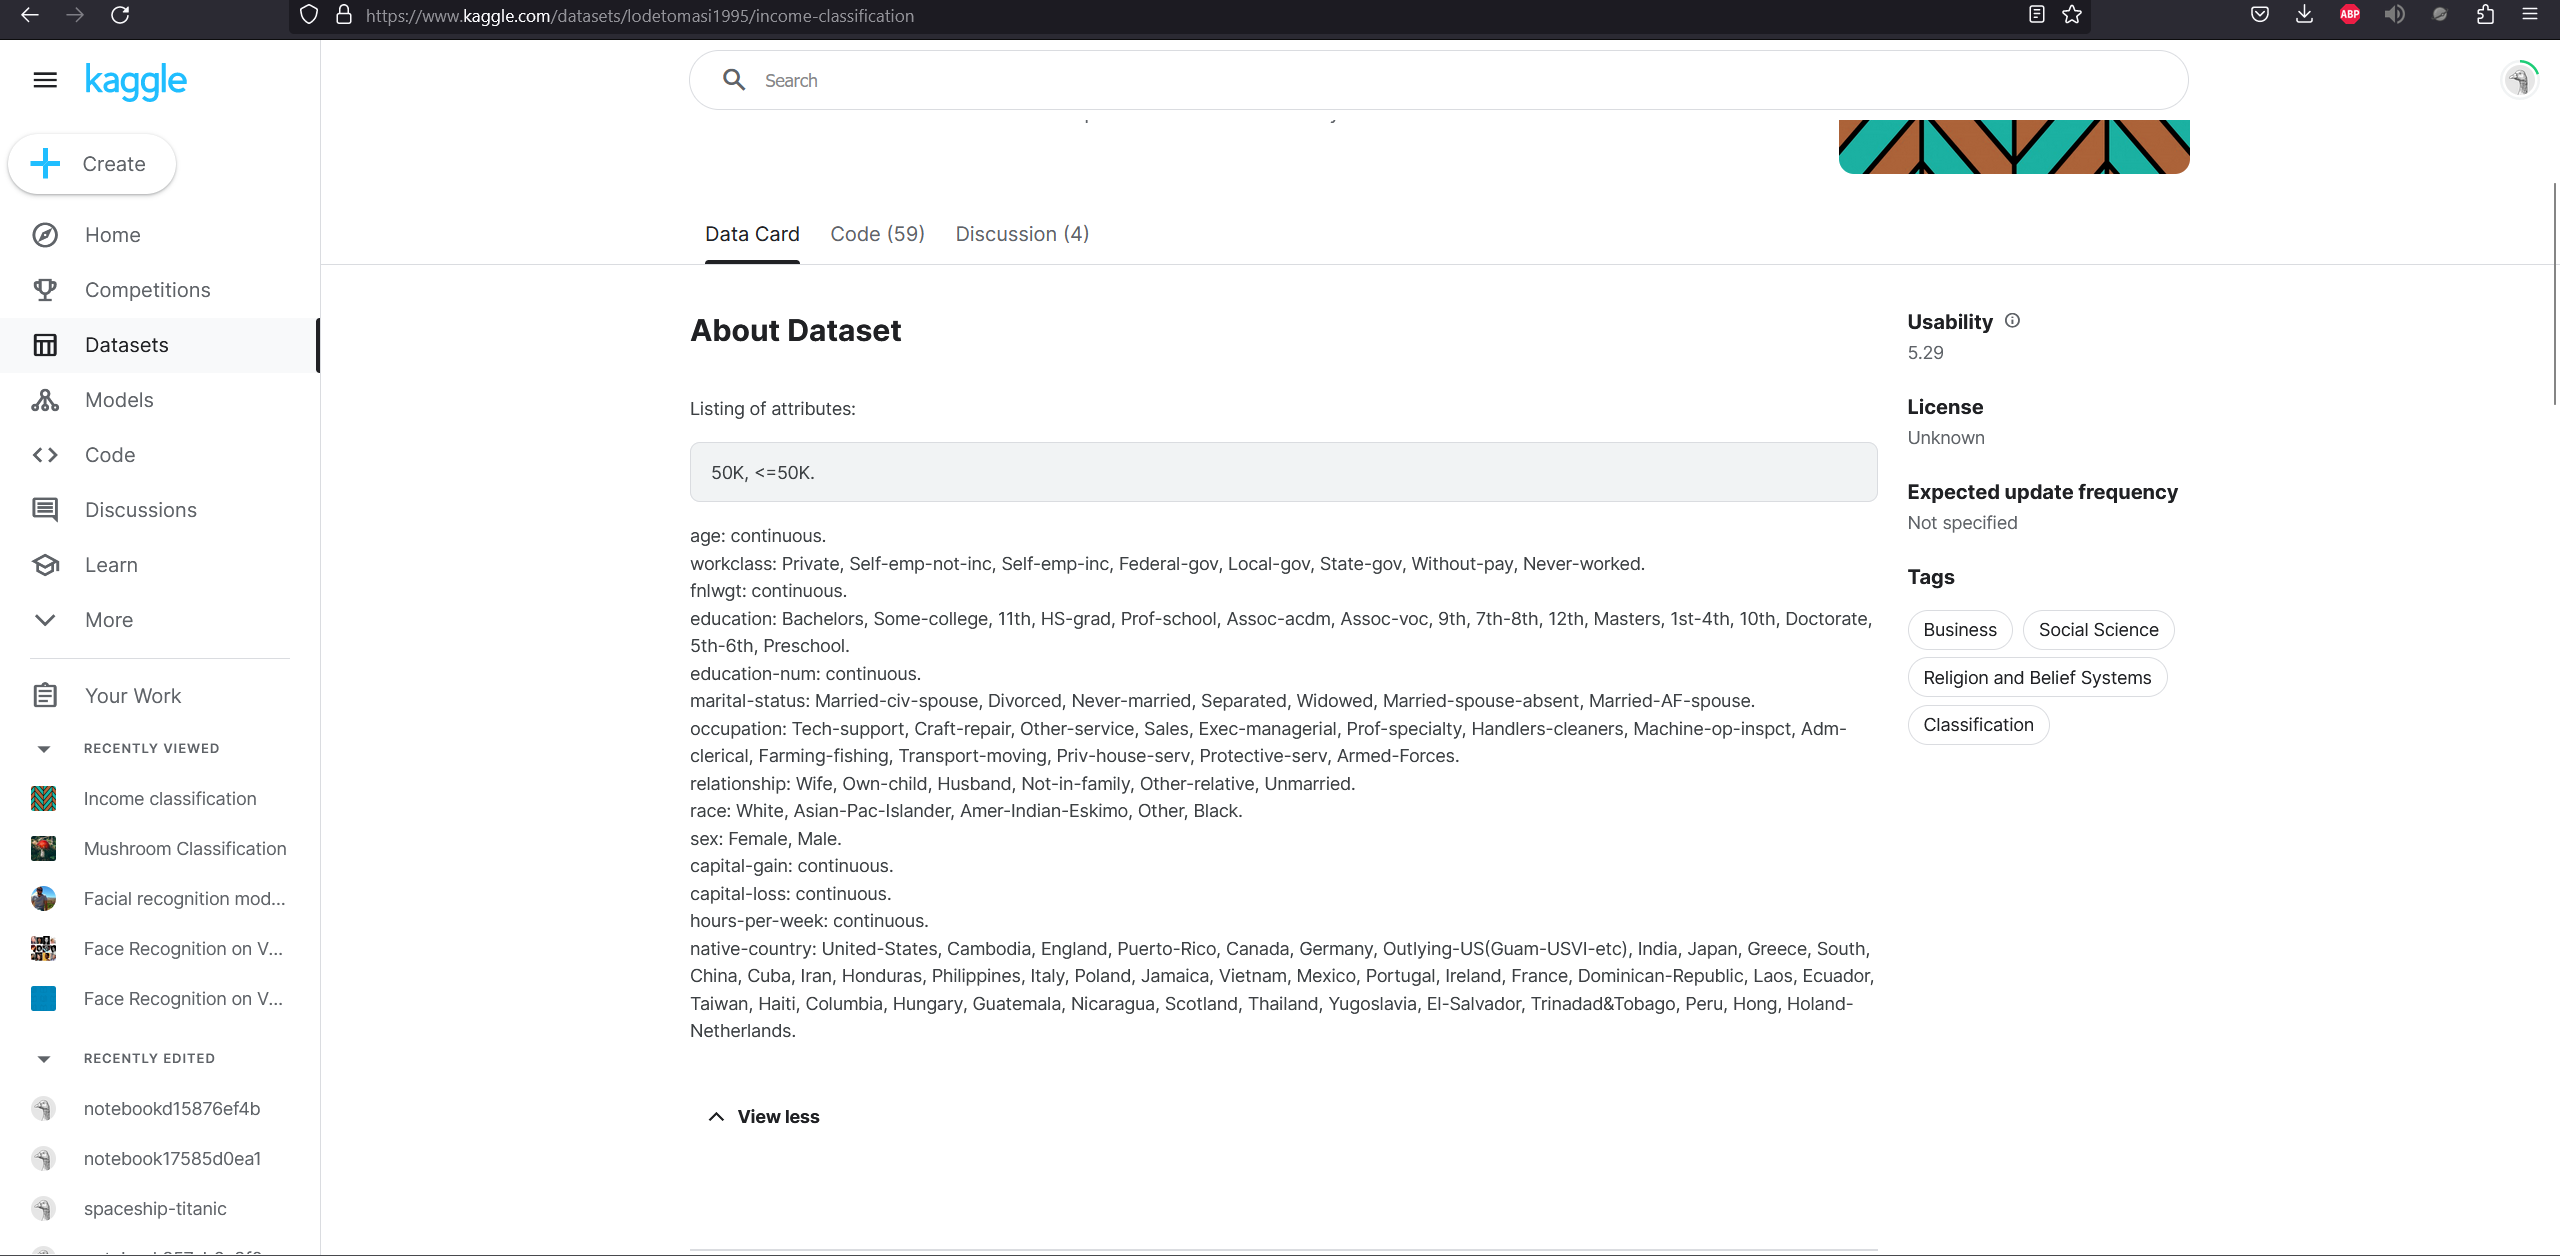

Описание датасета:

- возраст: непрерывный.
- рабочий класс: Частный, Самозанятый, не являющийся корпорацией, Самозанятый, федеральный, местный, Государственный, Неоплачиваемый, никогда не работавший.
- fnlwgt: непрерывный.
- образование: Бакалавры, некоторые-колледжи, 11-е, высшее образование, профшкола, доцент-acdm, доцент-voc, 9-е, 7-8-е, 12-е, магистры, 1-4-е, 10-е, докторская степень, 5-6-е, дошкольное учреждение.
- образование-количество: непрерывное.
- семейное положение: Женат-гражданский супруг, Разведен, Никогда не был женат, Живет раздельно, овдовел, Женат-супруг отсутствует, Женат-БЫВШИЙ супруг.
- профессия: Техническая поддержка, Ремонт судов, Прочие услуги, Продажи, Исполнительный директор, Профессиональная специальность, Грузчики-уборщики, Машинный инспектор, Администратор-клерк, Сельское хозяйство-рыболовство, Транспорт-переезд, Частный дом-служба, Служба охраны, Вооруженные силы.
- отношения: Жена, Собственный ребенок, Муж, Не состоящий в семье, Другой родственник, Не состоящий в браке.
- раса: Белая, азиат-выходец с Тихоокеанских островов, амер-индеец-эскимос, Другая, чернокожая.
- пол: Женщина, мужчина.
- прирост капитала: непрерывный.
- потери капитала: непрерывные.
- количество часов в неделю: непрерывно.
-  страна происхождения: Соединенные Штаты, Камбоджа, Англия, Пуэрто-Рико, Канада, Германия, окраины США (Гуам-USVI-etc), Индия, Япония, Греция, Юг, Китай, Куба, Иран, Гондурас, Филиппины, Италия, Польша, Ямайка, Вьетнам, Мексика, Португалия, Ирландия, Франция, Доминиканская Республика, Лаос, Эквадор, Тайвань, Гаити, Колумбия, Венгрия, Гватемала, Никарагуа, Шотландия, Таиланд, Югославия, Сальвадор, Тринадад и Тобаго, Перу, Гонконг, Голландия.

**Размер датасета**

In [3]:
dataset.shape

(32561, 15)

**Основная информация о датасете**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Описательная статистика числовых признаков**

In [5]:
dataset.describe() 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Статистика категориальных признаков**

In [6]:
dataset.describe(include=['O']) 

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Если уникальных значений будет очень-очень много, например, какой-нибудь id и подобное, то можно смело потом удалить, но нужно об этом написать обязательно, вообще чем больше выводов и объяснений, тем лучше, так как училка-чёлка доёбывает за это. Команда для удаления колонки `dataset.drop(columns=['колонка1', 'колнка2' ..], inplace=True)`

**Матрица корреляций**

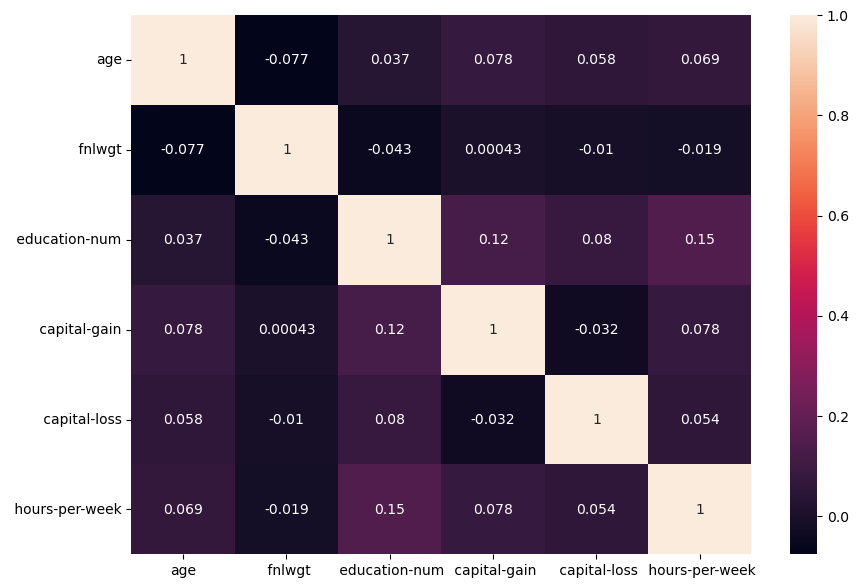

In [7]:
plt.figure(figsize = (10,7))
sns.heatmap(dataset.corr(), annot=True);

**Проверка пропусков**

In [8]:
dataset.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

Вывод - пропусков нет(или если будут, то пропуски есть, их надо удалить)

В случае если пропуски будут:

In [9]:
# sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis'); # визуализация 

- Если в одном столбце очень много пропусков - ну примерно процентов 40+, то столбик можно удалить делается командой `dataset.drop(columns=['колонка1', 'колонка2' ..], inplace=True)`
- Если пропусков в колонках в целом немного пропусков, можно сделать `dataset.dropna(inplace=True)`

Перед удалением подумайте

**Подсчёт повторяющих строк в датасете**

In [10]:
len(dataset)-len(dataset.drop_duplicates())

24

Вывод - надо удалить повторяющиеся значения

In [11]:
dataset.drop_duplicates(inplace=True)

После этого можно сделать какую-нибудь визуализацию, я скину ноутбуки, там есть достаточно примеров, как визуализировать данные. Если успеете - возьмёте оттуда

**Переведение категориальных значений в числовые**

Здесь надо быть внимательными, т.к. среди колнок - ` income`, который мы будем предсказывать(целевая метка, таргет).
Иногда она уже бывает закодирована, а иногда нет, как в этом датасете

Видно, что она принимает два значения (unique=2), поэтому в принципе можно закодировать вместе со всеми, однако если будет unique>2, то для этого нужно использовать LabelEncoder следующим образом:

```
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['наша_колонка'] = le.fit_transform(df['наша_колонка'])
```

документация - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [12]:
dataset.describe(include=['O']) # какие ячейки у нас нечисловые

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [13]:
dataset.columns = dataset.columns.str.strip() # удалить пробелы перед названием столбцов
list_of_str_columns = dataset.describe(include=['O']).columns.tolist()
list_of_str_columns.remove('income')
list_of_str_columns  # тут чет пробел перед словом, так и было, такой датасет

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

**кодируем колонки**

In [14]:
# Проходимся по всем категориальным колонкам и добавляем в список уже закодированные
list_of_encoded_columns = []
for col in list_of_str_columns:
    list_of_encoded_columns.append(pd.get_dummies(dataset[col], drop_first=True))

In [15]:
# кодируем целевую метку
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset['income'] = le.fit_transform(dataset['income'])

**присоединяем закодированные колонки**

In [16]:
# *list_of_encoded_columns - распаковываем значения из списка
dataset = pd.concat([dataset, *list_of_encoded_columns], axis=1)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,0,0


**удаляем первоначальные колонки**

In [17]:
dataset.drop(list_of_str_columns, axis=1, inplace=True)
dataset.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Never-worked,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**убеждаемся, что нет нечисловых колонок**

In [18]:
dataset.info() # тут только int и uint, значит всё хорошо

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Columns: 101 entries, age to  Yugoslavia
dtypes: int32(1), int64(6), uint8(94)
memory usage: 4.8 MB


Теперь надо посмотреть на распределение нашей целевой метки

In [19]:
dataset['income'].value_counts()

0    24698
1     7839
Name: income, dtype: int64

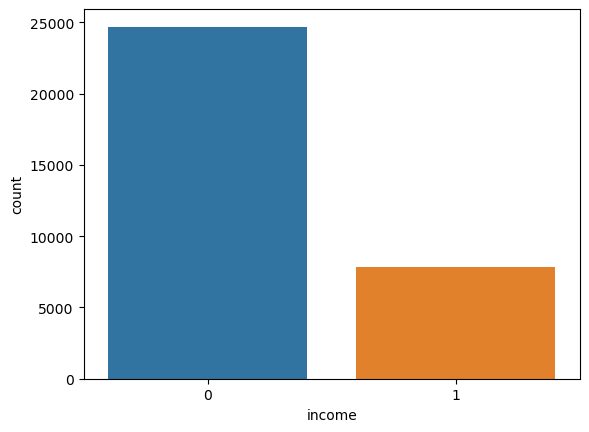

In [20]:
sns.countplot(x='income', data=dataset);

Видно, что классы не сбалансированы, при случае сбалансируем. Также будет ноутбук, где есть код для балансировки

# Обучение модели

**Разделим датасет на признаки и целевую метрику**

In [21]:
X = dataset.drop(columns=['income'])
y = dataset['income']

**Отшкалируем наши признаки**

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Разделим датасет на обучающую и тестирующую выборки**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Обучение моделей**

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

Логистическая регрессия

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

Оценка логистической регрессии (за основу берём f1_score и матрицу ошибок, потому что классы не сбалансированы, иначе бы можно было оценивать по всем доступным метрикам)

In [26]:
print(f"Test accuracy_score {accuracy_score(y_test, y_pred):.3f}")
print(f"Test f1_score {f1_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test recall_score {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test precision_score {precision_score(y_test, y_pred, average='weighted'):.3f}")
print("=================================================")
print(classification_report(y_test, y_pred))

Test accuracy_score 0.853
Test f1_score 0.848
Test recall_score 0.853
Test precision_score 0.847
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7405
           1       0.73      0.61      0.67      2357

    accuracy                           0.85      9762
   macro avg       0.81      0.77      0.79      9762
weighted avg       0.85      0.85      0.85      9762



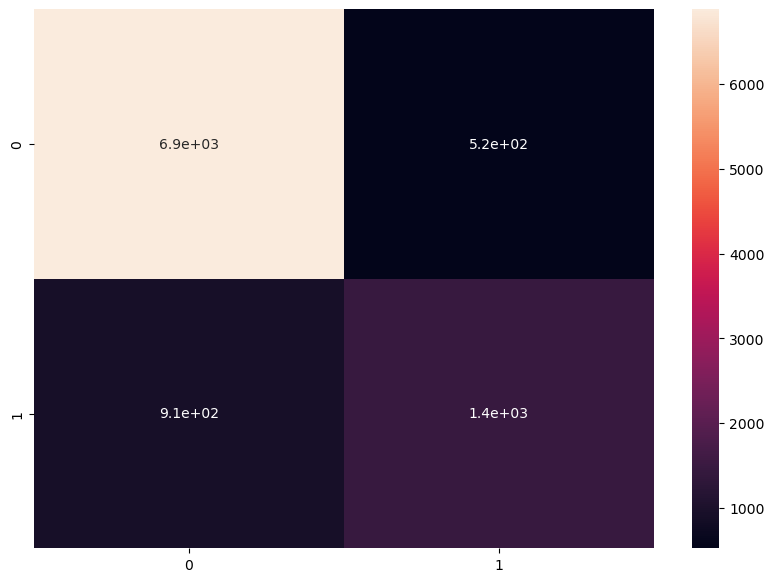

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

Оценим модель с помощью кросс-валидации

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=5, scoring='f1_weighted')
print(f"f1_weighted - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

f1_weighted - 0.846 со стандартным отклонением 0.004


Метод опорных векторов

In [29]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train) # может долго обучаться, это нормально
y_pred = svc.predict(X_test) 

Оценка метода опорных векторов

In [30]:
print(f"Test accuracy_score {accuracy_score(y_test, y_pred):.3f}")
print(f"Test f1_score {f1_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test recall_score {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test precision_score {precision_score(y_test, y_pred, average='weighted'):.3f}")
print("=================================================")
print(classification_report(y_test, y_pred))

Test accuracy_score 0.847
Test f1_score 0.839
Test recall_score 0.847
Test precision_score 0.839
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7405
           1       0.74      0.57      0.64      2357

    accuracy                           0.85      9762
   macro avg       0.80      0.75      0.77      9762
weighted avg       0.84      0.85      0.84      9762



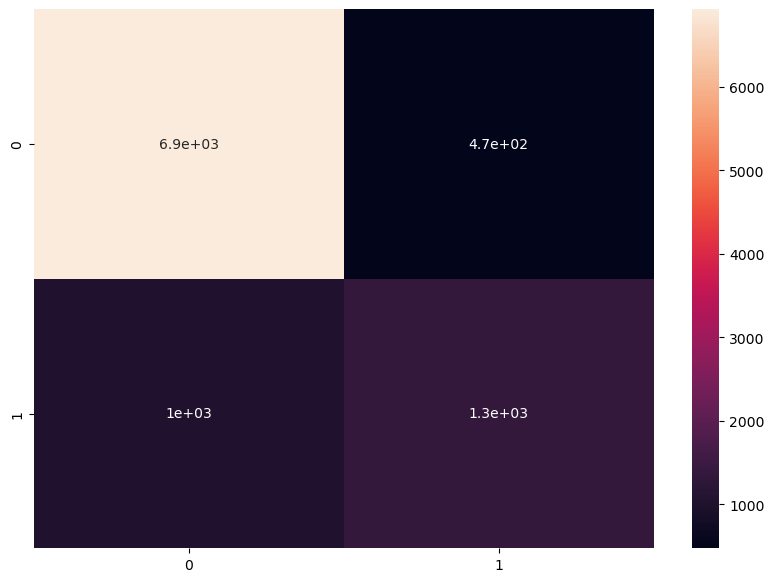

In [31]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

Оценим метод опорных векторов с помощью кросс-валидации

In [32]:
#scores = cross_val_score(SVC(kernel='rbf'), X, y, cv=5, scoring='f1_weighted') # может долго считать, это нормально
#print(f"f1_weighted - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

Дерево решений

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

Оценка дерева решений

In [34]:
print(f"Test accuracy_score {accuracy_score(y_test, y_pred):.3f}")
print(f"Test f1_score {f1_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test recall_score {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test precision_score {precision_score(y_test, y_pred, average='weighted'):.3f}")
print("=================================================")
print(classification_report(y_test, dtc.predict(X_test)))

Test accuracy_score 0.812
Test f1_score 0.813
Test recall_score 0.812
Test precision_score 0.814
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7405
           1       0.61      0.63      0.62      2357

    accuracy                           0.81      9762
   macro avg       0.74      0.75      0.75      9762
weighted avg       0.81      0.81      0.81      9762



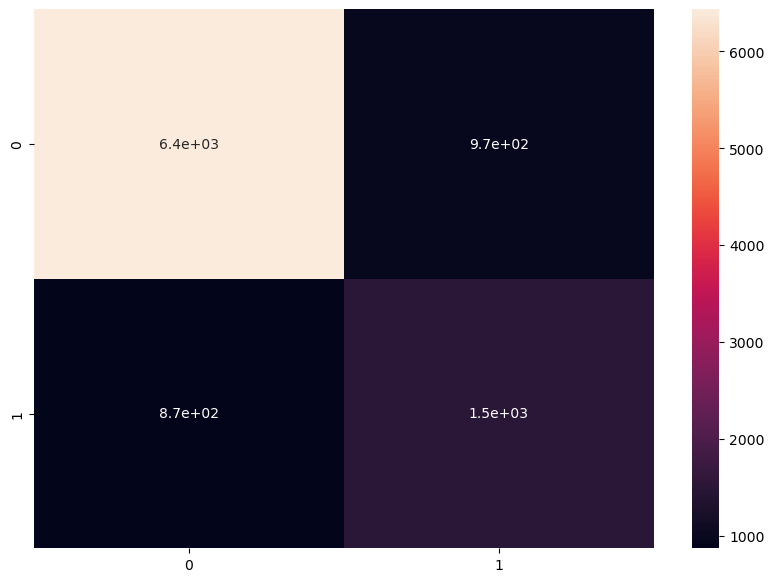

In [35]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

Оценим дерево решений с помощью кросс-валидации

In [36]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='f1_weighted')
print(f"f1_weighted - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

f1_weighted - 0.815 со стандартным отклонением 0.004


Случайный лес

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Оценка случайного леса

In [38]:
print(f"Test accuracy_score {accuracy_score(y_test, y_pred):.3f}")
print(f"Test f1_score {f1_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test recall_score {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test precision_score {precision_score(y_test, y_pred, average='weighted'):.3f}")
print("=================================================")
print(classification_report(y_test, dtc.predict(X_test)))

Test accuracy_score 0.854
Test f1_score 0.850
Test recall_score 0.854
Test precision_score 0.849
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7405
           1       0.61      0.63      0.62      2357

    accuracy                           0.81      9762
   macro avg       0.74      0.75      0.75      9762
weighted avg       0.81      0.81      0.81      9762



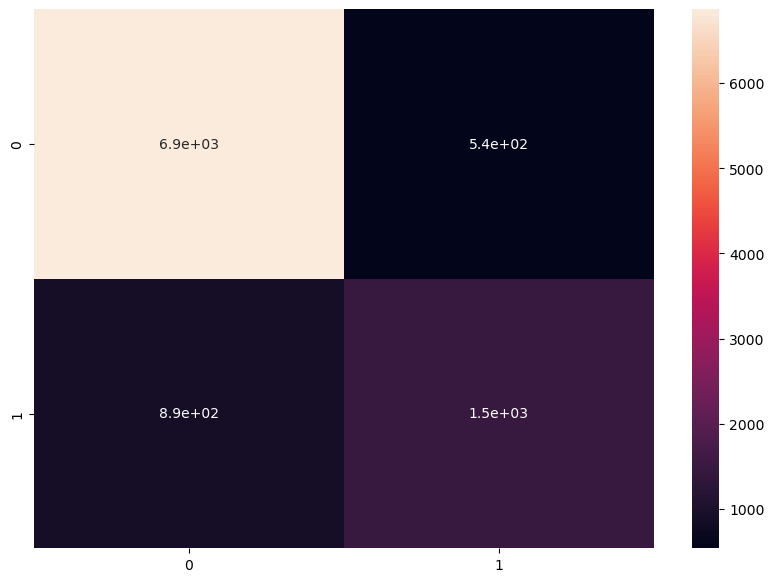

In [39]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

Оценим случайный лес с помощью кросс-валидации

In [40]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='f1_weighted')
print(f"f1_weighted - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

f1_weighted - 0.849 со стандартным отклонением 0.003


Здесь надо будет написать вывод - напишите предложений 5, этого хватит. Надо проанализировать выбранные метрики, указать какие метрики у каких моделей лучше, какие хуже, проанализируйте матрицу ошибок у каждой из моделей. Напишите про крезультаты кросс-валидации